In [13]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [164]:
card_train=pd.read_csv('D:/hkust_s2/5054/mid/card_train.csv', index_col=0)
card_test=pd.read_csv('D:/hkust_s2/5054/mid/card_test.csv', index_col=0)

In [165]:
clf = LogisticRegression(random_state=0).fit(card_train[card_train.columns.tolist()[1:-1]], card_train[card_train.columns.tolist()[-1]])
predict=clf.predict_proba(card_test.iloc[:,1:-1])
predict_1_prob=[i[1] for i in predict]
predict_1_0=[1 if i>=0.5  else 0 for i in predict_1_prob ]

In [166]:
from sklearn.metrics import accuracy_score
print('the overall error is '+str(1-accuracy_score(card_test['Class'], predict_1_0)))

the overall error is 0.0008273894436519047


In [103]:
def find_threshold(threshold):
    predict_tmp=[1 if i>=threshold  else 0 for i in predict_1_prob ]
    return 1-accuracy_score(card_test['Class'], predict_tmp)

init_error=1
for ii in np.arange(0,1,0.02):
    error_tmp=find_threshold(ii)
    if error_tmp<init_error:
        init_error=error_tmp
        threshold_final=ii

In [104]:
from sklearn.metrics import confusion_matrix
###01
##0
##1
predict_tmp=[1 if i>=0.16  else 0 for i in predict_1_prob ]
C_matrix=confusion_matrix(card_test['Class'], predict_tmp)
C_matrix

array([[69977,    23],
       [   26,    74]], dtype=int64)

In [137]:
####sensitivity
C_matrix[1][1]/(C_matrix[1][1]+C_matrix[0][1])

0.8085106382978723

In [138]:
####specificity
C_matrix[0][0]/(C_matrix[0][0]+C_matrix[1][0])

0.9996571722423793

In [139]:

clf = LogisticRegression(random_state=0).fit(card_train[card_train.columns.tolist()[1:-1]], card_train[card_train.columns.tolist()[-1]])
predict=clf.predict_proba(card_test.iloc[:,1:-1])
predict_1_prob=[i[1] for i in predict]
predict_1_0=[1 if i>=0.5  else 0 for i in predict_1_prob ]
print('when threshold=0.5, the overall error of LR is '+str(1-accuracy_score(card_test['Class'], predict_1_0)))
def find_threshold(threshold):
    predict_tmp=[1 if i>=threshold  else 0 for i in predict_1_prob ]
    return 1-accuracy_score(card_test['Class'], predict_tmp)
init_error=1
for ii in np.arange(0,1,0.02):
    error_tmp=find_threshold(ii)
    if error_tmp<init_error:
        init_error=error_tmp
        threshold_final=ii
print('the perfect threshold is '+str(threshold_final))
predict_tmp=[1 if i>=threshold_final  else 0 for i in predict_1_prob ]
C_matrix=confusion_matrix(card_test['Class'], predict_tmp)
####sensitivity
print(' the sensitivity of LR with threshod '+str(threshold_final) +' is '+str(C_matrix[1][1]/(C_matrix[1][1]+C_matrix[0][1])))
####specificity
print(' the specificity of LR with threshod '+str(threshold_final) +' is '+str(C_matrix[0][0]/(C_matrix[0][0]+C_matrix[1][0])))

when threshold=0.5, the overall error of LR is 0.0008273894436519047
the perfect threshold is 0.16
 the sensitivity of LR with threshod 0.16 is 0.7628865979381443
 the specificity of LR with threshod 0.16 is 0.9996285873462566


In [140]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis().fit(card_train[card_train.columns.tolist()[1:-1]], card_train[card_train.columns.tolist()[-1]])
predict=clf.predict_proba(card_test.iloc[:,1:-1])
predict_1_prob=[i[1] for i in predict]
predict_1_0=[1 if i>=0.5  else 0 for i in predict_1_prob ]
print('when threshold=0.5, the overall error of LDA is '+str(1-accuracy_score(card_test['Class'], predict_1_0)))
def find_threshold(threshold):
    predict_tmp=[1 if i>=threshold  else 0 for i in predict_1_prob ]
    return 1-accuracy_score(card_test['Class'], predict_tmp)
init_error=1
for ii in np.arange(0,1,0.02):
    error_tmp=find_threshold(ii)
    if error_tmp<init_error:
        init_error=error_tmp
        threshold_final=ii
print('the perfect threshold is '+str(threshold_final))
predict_tmp=[1 if i>=threshold_final  else 0 for i in predict_1_prob ]
C_matrix=confusion_matrix(card_test['Class'], predict_tmp)
####sensitivity
print(' the sensitivity of LDA with threshod '+str(threshold_final) +' is '+str(C_matrix[1][1]/(C_matrix[1][1]+C_matrix[0][1])))
####specificity
print(' the specificity of LDA with threshod '+str(threshold_final) +' is '+str(C_matrix[0][0]/(C_matrix[0][0]+C_matrix[1][0])))

when threshold=0.5, the overall error of LDA is 0.0006134094151212244
the perfect threshold is 0.02
 the sensitivity of LDA with threshod 0.02 is 0.8085106382978723
 the specificity of LDA with threshod 0.02 is 0.9996571722423793


In [141]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis().fit(card_train[card_train.columns.tolist()[1:-1]], card_train[card_train.columns.tolist()[-1]])
predict=clf.predict_proba(card_test.iloc[:,1:-1])
predict_1_prob=[i[1] for i in predict]
predict_1_0=[1 if i>=0.5  else 0 for i in predict_1_prob ]
print('when thershold=0.5, the overall error of QDA is '+str(1-accuracy_score(card_test['Class'], predict_1_0)))
def find_threshold(threshold):
    predict_tmp=[1 if i>=threshold  else 0 for i in predict_1_prob ]
    return 1-accuracy_score(card_test['Class'], predict_tmp)
init_error=1
for ii in np.arange(0,1,0.02):
    error_tmp=find_threshold(ii)
    if error_tmp<init_error:
        init_error=error_tmp
        threshold_final=ii
print('the perfect threshold is '+str(threshold_final))
predict_tmp=[1 if i>=threshold_final  else 0 for i in predict_1_prob ]
C_matrix=confusion_matrix(card_test['Class'], predict_tmp)
####sensitivity
print(' the sensitivity of QDA with threshod '+str(threshold_final) +' is '+str(C_matrix[1][1]/(C_matrix[1][1]+C_matrix[0][1])))
####specificity
print(' the specificity of QDA with threshod '+str(threshold_final) +' is '+str(C_matrix[0][0]/(C_matrix[0][0]+C_matrix[1][0])))

when thershold=0.5, the overall error of QDA is 0.02286733238231098
the perfect threshold is 0.98
 the sensitivity of QDA with threshod 0.98 is 0.06976744186046512
 the specificity of QDA with threshod 0.98 is 0.9997677659080353


In [144]:
from sklearn.model_selection import KFold
def find_threshold(threshold):
    predict_tmp=[1 if i>=threshold  else 0 for i in predict_1_prob ]
    return 1-accuracy_score(card_test['Class'], predict_tmp)
#kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
X=card_train[card_train.columns.tolist()[1:-1]]
Y=card_train[card_train.columns.tolist()[-1]]
init_error=1
error_list=[]
for threshold in np.arange(0,1,0.1):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    error_tmp=0
    for train_ix, test_ix in kfold.split(X):
        # select rows
        train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
        train_y, test_y = Y.iloc[train_ix], Y.iloc[test_ix]
        clf = LogisticRegression(random_state=0).fit(train_X, train_y)
        predict=clf.predict_proba(card_test.iloc[:,1:-1])
        predict_1_prob=[i[1] for i in predict]
        predict_1_0=[1 if i>=threshold  else 0 for i in predict_1_prob ]
        error_tmp+=1-accuracy_score(card_test['Class'], predict_1_0)
    error_tmp=error_tmp/5
    error_list.append(error_tmp)
    if error_tmp<init_error:
        init_error=error_tmp
        threshold_final=threshold
print('the best threshold of LR in 5CV is '+str(threshold_final))
predict_tmp=[1 if i>=threshold_final  else 0 for i in predict_1_prob ]
C_matrix=confusion_matrix(card_test['Class'], predict_tmp)
####sensitivity
print(' the sensitivity of LR with threshod '+str(threshold_final) +' is '+str(C_matrix[1][1]/(C_matrix[1][1]+C_matrix[0][1])))
####specificity
print(' the specificity of LR with threshod '+str(threshold_final) +' is '+str(C_matrix[0][0]/(C_matrix[0][0]+C_matrix[1][0])))

the best threshold of LR in 5CV is 0.2
 the sensitivity of LR with threshod 0.2 is 0.7717391304347826
 the specificity of LR with threshod 0.2 is 0.9995857616272426


In [143]:
threshold

0.75

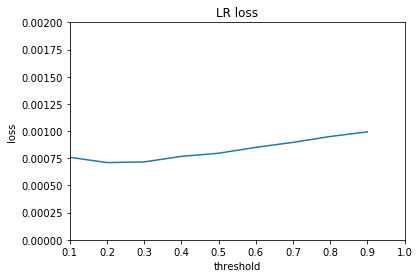

In [147]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(np.arange(0,1,0.1),error_list)
plt.title("LR loss")
plt.xlim(0.1,1)
plt.ylim(0,0.002)
plt.xlabel('threshold')
plt.ylabel('loss')
plt.show()

In [124]:
clf = LogisticRegression(random_state=0).fit(card_train[card_train.columns.tolist()[1:-1]], card_train[card_train.columns.tolist()[-1]])
predict=clf.predict_proba(card_test.iloc[:,1:-1])
predict_1_prob=[i[1] for i in predict]
predict_1_0=[1 if i>=0.5  else 0 for i in predict_1_prob ]
print('the overall error when threshold is 0.5 is '+str(1-accuracy_score(card_test['Class'], predict_1_0)))
predict_1_0=[1 if i>=0.16  else 0 for i in predict_1_prob ]
print('the overall error when threshold is 0.16 get in search is '+str(1-accuracy_score(card_test['Class'], predict_1_0)))
predict_1_0=[1 if i>=0.2  else 0 for i in predict_1_prob ]
print('the overall error when threshold is 0.2 get in 5-fold is '+str(1-accuracy_score(card_test['Class'], predict_1_0)))

the overall error when threshold is 0.5 is 0.0008273894436519047
the overall error when threshold is 0.16 get in search is 0.0006990014265335631
the overall error when threshold is 0.2 get in 5-fold is 0.0006990014265335631


In [148]:
from sklearn.model_selection import KFold
def find_threshold(threshold):
    predict_tmp=[1 if i>=threshold  else 0 for i in predict_1_prob ]
    return 1-accuracy_score(card_test['Class'], predict_tmp)
#kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
X=card_train[card_train.columns.tolist()[1:-1]]
Y=card_train[card_train.columns.tolist()[-1]]
init_error=1
error_list=[]
for threshold in np.arange(0,1,0.05):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    error_tmp=0
    for train_ix, test_ix in kfold.split(X):
        # select rows
        train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
        train_y, test_y = Y.iloc[train_ix], Y.iloc[test_ix]
        clf = LinearDiscriminantAnalysis().fit(train_X, train_y)
        predict=clf.predict_proba(card_test.iloc[:,1:-1])
        predict_1_prob=[i[1] for i in predict]
        predict_1_0=[1 if i>=threshold  else 0 for i in predict_1_prob ]
        error_tmp+=1-accuracy_score(card_test['Class'], predict_1_0)
    error_tmp=error_tmp/5
    error_list.append(error_tmp)
    if error_tmp<init_error:
        init_error=error_tmp
        threshold_final=threshold
print('the best threshold of LDA in 5CV is '+str(threshold_final))
predict_tmp=[1 if i>=threshold_final  else 0 for i in predict_1_prob ]
C_matrix=confusion_matrix(card_test['Class'], predict_tmp)
####sensitivity
print(' the sensitivity of LDA with threshod '+str(threshold_final) +' is '+str(C_matrix[1][1]/(C_matrix[1][1]+C_matrix[0][1])))
####specificity
print(' the specificity of LDA with threshod '+str(threshold_final) +' is '+str(C_matrix[0][0]/(C_matrix[0][0]+C_matrix[1][0])))

the best threshold of LDA in 5CV is 0.05
 the sensitivity of LDA with threshod 0.05 is 0.8085106382978723
 the specificity of LDA with threshod 0.05 is 0.9996571722423793


# part 2

In [2]:
f2 = open("D:/hkust_s2/5054/mid/Duke_train.txt","r")
Duke_train = f2.readlines()
f2.close()

In [3]:
Duke_train=[ll.split(',') for ll in Duke_train]

In [4]:
Duke_train_X=[]
for line in Duke_train:
    tmp=[]
    for i in range(1,len(line)):
        tmp.append(float(line[i].replace('\n','')))
    Duke_train_X.append(tmp)

In [5]:
Duke_train_Y=[float(ll[0]) for ll in Duke_train]

In [6]:
f2 = open("D:/hkust_s2/5054/mid/Duke_test.txt","r")
Duke_test = f2.readlines()
f2.close()
Duke_test=[ll.split(',') for ll in Duke_test]
Duke_test_X=[]
for line in Duke_test:
    tmp=[]
    for i in range(1,len(line)):
        tmp.append(float(line[i].replace('\n','')))
    Duke_test_X.append(tmp)
Duke_test_Y=[float(ll[0]) for ll in Duke_test]

In [146]:
LR = LogisticRegression(random_state=0).fit(Duke_train_X, Duke_train_Y)
LDA = LinearDiscriminantAnalysis().fit(Duke_train_X, Duke_train_Y)
QDA = QuadraticDiscriminantAnalysis().fit(pd.DataFrame(Duke_train_X), pd.DataFrame(Duke_train_Y))

# 2. ridge regression

In [153]:
def loss_func(w,x,y,lam):
    loss=0
    for i in range(0,len(x)):
        #print(i)
        try:
            loss+=y[i]*np.dot(w,x[i])-math.log(1+math.exp(np.dot(w,x[i])))
        except OverflowError:
            loss+=(y[i]-1)*np.dot(w,x[i])
        #print(loss)
    loss-=lam*sum([p**2 for p in w[0]])
    return loss

In [50]:
def loss_func_d1_mat(w,x,y,lam):
    b=np.array([y]).T-sigmoid(np.dot(x,w))
    #print(b.shape)
    grad=np.dot(x.T,b)-lam*w
    return grad

In [9]:
def loss_func_d2_mat(w,x,y,lam):
    ###build a diagonal matrix first
    diag_w=np.diag(np.ravel([np.exp(np.dot(x_tmp,w)/(1+math.exp(np.dot(x_tmp,w)))) for x_tmp in x]))
    hessian = (-1 * np.dot(np.dot(x.T , diag_w) , x))-(lam*np.identity(len(x[0])))
    return hessian

In [10]:
def sigmoid(x):
    return  1/(1 + np.exp(-x)) 

In [139]:
def train_ridge_LR(Duke_train_X,Duke_train_Y,lam):
    w0=np.array([0 for i in range(len(Duke_train_X[0]))])
    for iteration in range(251):
        if iteration==0:
            w_update=w0
        loss_tmp=loss_func(w_update,np.array(Duke_train_X),np.array(Duke_train_Y),lam)
        w_update2=w_update-\
        loss_func_d1(w_update,np.array(Duke_train_X),np.array(Duke_train_Y),lam)/loss_func_d2(w_update,np.array(Duke_train_X)
                                                                                              ,np.array(Duke_train_Y),lam)
        w_update=w_update2
        #ttt=[sigmoid(np.dot(w_update,x_tmp)) for x_tmp in np.array(Duke_train_X)]
        #predict_tmp=[1 if i>=0.5  else 0 for i in ttt ]
    return loss_func(w_update,np.array(Duke_train_X),np.array(Duke_train_Y),lam),w_update

In [151]:
def train_ridge_LR_mat(Duke_train_X,Duke_train_Y,lam):
    w0=np.array([0 for i in range(len(Duke_train_X[0]))])
    for iteration in range(15):
        #print(iteration)
        if iteration==0:
            w_update=np.array([w0]).T
        loss_tmp=loss_func(w_update.T,np.array(Duke_train_X),np.array(Duke_train_Y),lam)
        grad=loss_func_d1_mat(w_update,np.array(Duke_train_X),np.array(Duke_train_Y),1)
        hessian=loss_func_d2_mat(w_update,np.array(Duke_train_X),np.array(Duke_train_Y),1)
        hessian_inv=np.linalg.inv(hessian)
        w_update=w_update-np.dot(hessian_inv,grad)
        #ttt=[sigmoid(np.dot(w_update,x_tmp)) for x_tmp in np.array(Duke_train_X)]
        #predict_tmp=[1 if i>=0.5  else 0 for i in ttt ]
    return loss_func(w_update.T,np.array(Duke_train_X),np.array(Duke_train_Y),lam),w_update

In [66]:
%time train_ridge_LR_mat(X,Y,1)

0
1
2
3
4
Wall time: 4min 35s


(array([-9.6490801]), array([[-0.00129553],
        [ 0.00253505],
        [-0.00256999],
        ...,
        [ 0.00358974],
        [-0.00053833],
        [ 0.00299863]]))

In [88]:
####mat type
from sklearn.model_selection import KFold
def find_threshold(threshold):
    predict_tmp=[1 if i>=threshold  else 0 for i in predict_1_prob ]
    return 1-accuracy_score(card_test['Class'], predict_tmp)
#kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
X=np.array(Duke_train_X)
Y=np.array(Duke_train_Y)
init_error=-999999
item_time=0
for lam in [0.5,1,2,10,50,100]:
    print(lam)
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    loss_tmp=0
    for train_ix, test_ix in kfold.split(X):
        # select rows
        item_time+=1
        #print(item_time)
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = Y[train_ix], Y[test_ix]
        loss_train,weight = train_ridge_LR_mat(train_X, train_y,lam)
        #predict=[sigmoid(np.dot(weight,x_tmp)) for x_tmp in np.array(test_X)]
        loss_test=loss_func(weight.T,test_X,test_y,lam)
        loss_tmp+=loss_test[0]
    loss_tmp=loss_tmp/5
    if loss_tmp>init_error:
        init_error=loss_tmp
        best_lam=lam
    print(' the lambda is: '+str(lam)+' , and the loss is : '+str(loss_tmp))
print('the max loss in 5CV is '+str(init_error))
print('the best lambda is '+str(best_lam))

0.5
 the lambda is: 0.5 , and the loss is : -14.770582539098555
1
 the lambda is: 1 , and the loss is : -14.895968764686483
2
 the lambda is: 2 , and the loss is : -15.146741215862345
10
 the lambda is: 10 , and the loss is : -17.15292082526925
50
 the lambda is: 50 , and the loss is : -27.183818872303743
100
 the lambda is: 100 , and the loss is : -39.72244143109687
the max loss in 5CV is -14.770582539098555
the best lambda is 0.5


In [136]:
####mat type
from sklearn.model_selection import KFold
def find_threshold(threshold):
    predict_tmp=[1 if i>=threshold  else 0 for i in predict_1_prob ]
    return 1-accuracy_score(card_test['Class'], predict_tmp)
#kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
X=np.array(Duke_train_X)
Y=np.array(Duke_train_Y)
init_error=-999999
item_time=0
for lam in [0.5,1,10,100]:
    print(lam)
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    loss_tmp=0
    for train_ix, test_ix in kfold.split(X):
        # select rows
        item_time+=1
        #print(item_time)
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = Y[train_ix], Y[test_ix]
        loss_train,weight = train_ridge_LR_mat(train_X, train_y,lam)
        #predict=[sigmoid(np.dot(weight.T,x_tmp)[0]) for x_tmp in np.array(test_X)]
        #predict_1_0=[1 if i>=0.5  else 0 for i in predict ]
        #accuracy_score(test_y, predict)
        loss_test=loss_func(weight.T,test_X,test_y,lam)
        loss_tmp+=loss_test[0]
    loss_tmp=loss_tmp/5
    if loss_tmp>init_error:
        init_error=loss_tmp
        best_lam=lam
        predict=[sigmoid(np.dot(weight.T,x_tmp)[0]) for x_tmp in np.array(test_X)]
        predict_1_0=[1 if i>=0.5  else 0 for i in predict ]
    print(' the lambda is: '+str(lam)+' , and the loss is : '+str(loss_tmp)+' and the accuracy is '+str(accuracy_score(test_y, predict_1_0)))
print('the max loss in 5CV is '+str(init_error))
print('the best lambda is '+str(best_lam))

0.5
 the lambda is: 0.5 , and the loss is : -14.770582539098555 and the accuracy is 0.7692307692307693
1
 the lambda is: 1 , and the loss is : -14.895968764686483 and the accuracy is 0.7692307692307693
10


KeyboardInterrupt: 

In [130]:
np.dot(weight.T,np.array(test_X)[0])[0]

8.541307335516482

In [154]:
####we choose lambda  as 0.5
loss,weight=train_ridge_LR_mat(Duke_train_X,Duke_train_Y,0.5)

In [ ]:
predict=[sigmoid(np.dot(weight,x_tmp)) for x_tmp in np.array(Duke_test_X)]
predict_1_0=[1 if i>=0.5  else 0 for i in predict ]
print('the overall error is '+str(1-accuracy_score(Duke_test_Y, predict_1_0)))

# LDA

In [7]:
def u_k(X,Y,target):
    index=[i for i in range(len(Y)) if Y[i] == target]
    return np.mean(X[index], axis=0)

In [8]:
def pi_k(Y,target):
    return len([i for i in range(len(Y)) if Y[i] == target])/len(Y)

In [9]:
def ridge_matrix(X,Y,target_list,lam):
    init_mat=np.zeros([len(X[0]),len(X[0])])
    for target in target_list:
        uk=u_k(X,Y,target)
        index_list=[i for i in range(len(Y)) if Y[i] == target]
        cov_matrix=np.cov(X[index_list].T)
        init_mat+=cov_matrix
    init_mat=init_mat/(len(X)-len(target_list))
    identity_mat=np.eye(len(X[0]))
    init_mat+=lam*identity_mat
    return init_mat

In [10]:
def dirac(x,r_mat_inv,X,Y,target):
    uk=u_k(X,Y,target)
    #uk_inv=np.linalg.inv(uk)
    #r_matrix=ridge_matrix(X,Y,[0,1],lam)
    #r_mat_inv=np.linalg.inv(r_matrix)
    pik=pi_k(Y,target)
    #result=np.dot(np.dot(uk.T,r_mat_inv),x)-0.5*np.dot(np.dot(uk.T,r_mat_inv),uk)+math.log(pik)
    result=np.dot(np.dot(x.T,r_mat_inv),uk)-0.5*np.dot(np.dot(uk.T,r_mat_inv),uk)+math.log(pik)
    return result

In [11]:
def judge(x,r_mat_inv,train_X,train_Y):
    pred_1=dirac(x,r_mat_inv,train_X,train_Y,1)
    pred_0=dirac(x,r_mat_inv,train_X,train_Y,0)
    if pred_1>pred_0:
        return 1
    else:
        return 0

In [85]:
###LDA K-fold
def find_threshold(threshold):
    predict_tmp=[1 if i>=threshold  else 0 for i in predict_1_prob ]
    return 1-accuracy_score(card_test['Class'], predict_tmp)
#kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions
X=np.array(Duke_train_X)
Y=np.array(Duke_train_Y)
init_error=999999
for lam in [0,0.1,0.5,1,2,10,50,100]:
    print(lam)
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    error_rate=0
    for train_ix, test_ix in kfold.split(X):
        # select rows
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = Y[train_ix], Y[test_ix]
        r_matrix=ridge_matrix(train_X,train_y,[0,1],lam)
        r_mat_inv=np.linalg.inv(r_matrix)
        predict=[judge(x_tmp,r_mat_inv,train_X,train_y) for x_tmp in test_X ]
        error_rate+=1-accuracy_score(test_y, predict)
    error_rate=error_rate/5
    if error_rate<init_error:
        init_error=error_rate
        best_lam=lam
    print(' the lambda is: '+str(lam)+' , and the error_rate is : '+str(error_rate))
print('the min error_rate in 5CV is '+str(init_error))
print('the best lambda is '+str(best_lam))

0
 the lambda is: 0 , and the error_rate is : 0.5505494505494506
0.1
 the lambda is: 0.1 , and the error_rate is : 0.04615384615384614
0.5
 the lambda is: 0.5 , and the error_rate is : 0.04615384615384614
1
 the lambda is: 1 , and the error_rate is : 0.04615384615384614
2
 the lambda is: 2 , and the error_rate is : 0.04615384615384614
10
 the lambda is: 10 , and the error_rate is : 0.07692307692307691
50
 the lambda is: 50 , and the error_rate is : 0.16813186813186812
100
 the lambda is: 100 , and the error_rate is : 0.2593406593406593
the min error_rate in 5CV is 0.04615384615384614
the best lambda is 0.1


In [ ]:
###so we choose lambda as 1
r_matrix=ridge_matrix(np.array(Duke_train_X),np.array(Duke_train_Y),[0,1],1)
r_mat_inv=np.linalg.inv(r_matrix)
predict=[judge(x_tmp,r_mat_inv,train_X,train_y) for x_tmp in np.array(Duke_test_X) ]
print('the overall error is '+str(1-accuracy_score(Duke_test_Y, predict)))

In [16]:
predict=[judge(x_tmp,r_mat_inv,np.array(Duke_train_X),np.array(Duke_train_Y)) for x_tmp in np.array(Duke_test_X) ]
print('the overall error is '+str(1-accuracy_score(Duke_test_Y, predict)))

the overall error is 0.09999999999999998
